 график исследуемой функции f(x):

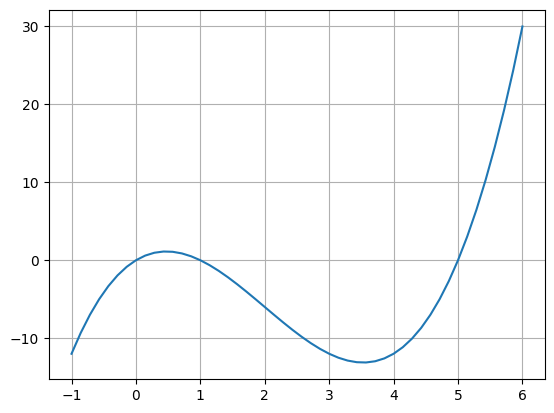

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return x**3 - 6 * x **  2 + 5 * x

x = np.linspace(-1, 6, 50)
y = f(x)

plt.plot(x,y)
plt.grid(True)

интервалы, содержащие корни уравнения f(x) = 0:

интервалы - [-0.9, 0.5]
            [0.5, 3.5]
            [3.5, 6]
корни -     [0, 1, 5]

метод деления отрезка пополам (бисекций):

In [68]:
def bisectionMethod(a, b, e):
    
    count = 0
    
    while abs(b - a) > e * 2:
        c = (a + b) / 2
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c

        count += 1
            
    return count

метод хорд:

In [69]:
def chordMethod(a, b, e):

    count = 0
    x_new = 0
    
    while True:
        count += 1
        x_prev = x_new
        x_new = a - ((f(a) * (b - a))/(f(b) - f(a)))

        
        f_prev = f(x_new)
        if (f_prev * f(b)) < 0:
            a = x_new
        else:
            b = x_new

        if abs(x_new - x_prev) < e:
            return count
    

метод Ньютона

In [70]:
def df(x):
    return 3 * x ** 2 - 12 * x + 5

def newtonsMethod(x0, e):
    
    count = 0

    while True:
        count += 1
        x_new = x0 - f(x0)/ df(x0)

        if abs(x_new - x0) < e:
            return count

        x0 = x_new

графики относительной погрешности каждого метода в зависимости от количества итераций

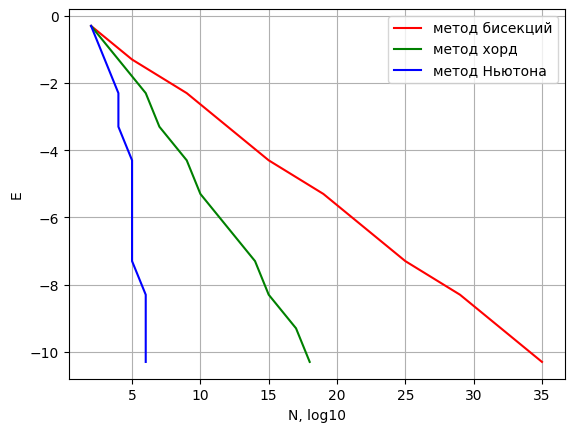

In [86]:
e = 0.5
list_n_bisectionMethod, list_n_chordMethod, list_n_newtonsMethod = [], [], []
list_y = []

for x in range(0,11):
    list_n_bisectionMethod.append(bisectionMethod(0.5, 3.5, e))
    list_n_chordMethod.append(chordMethod(0.5, 3.5, e))
    list_n_newtonsMethod.append(newtonsMethod(2, e))
    list_y.append(math.log10(e))
    e = e/10
    
plt.plot(list_n_bisectionMethod, list_y, color = 'red', label = "метод бисекций")
plt.plot(list_n_chordMethod, list_y, color = 'green', label = "метод хорд")
plt.plot(list_n_newtonsMethod, list_y, color = 'blue', label = "метод Ньютона")

plt.xlabel('N, log10')
plt.ylabel('E')
plt.legend()
plt.grid(True)